In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
test = pd.read_csv('NB15_testing-set.csv')
train = pd.read_csv('NB15_training-set.csv')
feature_desc = pd.read_csv('NB15_features.csv', encoding='cp1252')

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [54]:
#isolate + clean features
features = [
    'attack_cat','proto', 'is_ftp_login', 'is_sm_ips_ports', 'response_body_len']

train_encoded = train[features]
label_encoders = {}
for column in train_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_encoded[column] = le.fit_transform(train_encoded[column].astype(str))
    label_encoders[column] = le

test_encoded = test[features]
for column in test_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    test_encoded[column] = le.fit_transform(test_encoded[column].astype(str))
    label_encoders[column] = le

X_train = train_encoded
X_test =  test_encoded

y_train = train[['label']]
y_test = test[['label']]

/var/folders/ng/92pv0x_11vj5rbbqhrl2rzp00000gn/T/ipykernel_53714/3531050960.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_encoded[column] = le.fit_transform(train_encoded[column].astype(str))
/var/folders/ng/92pv0x_11vj5rbbqhrl2rzp00000gn/T/ipykernel_53714/3531050960.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_encoded[column] = le.fit_transform(train_encoded[column].astype(str))
/var/folders/ng/92pv0x_11vj5rbbqhrl2rzp00000gn/T/ipykernel_53714/3531050960.py:15: SettingWithCopyWarnin

In [55]:
test.shape


(82332, 45)

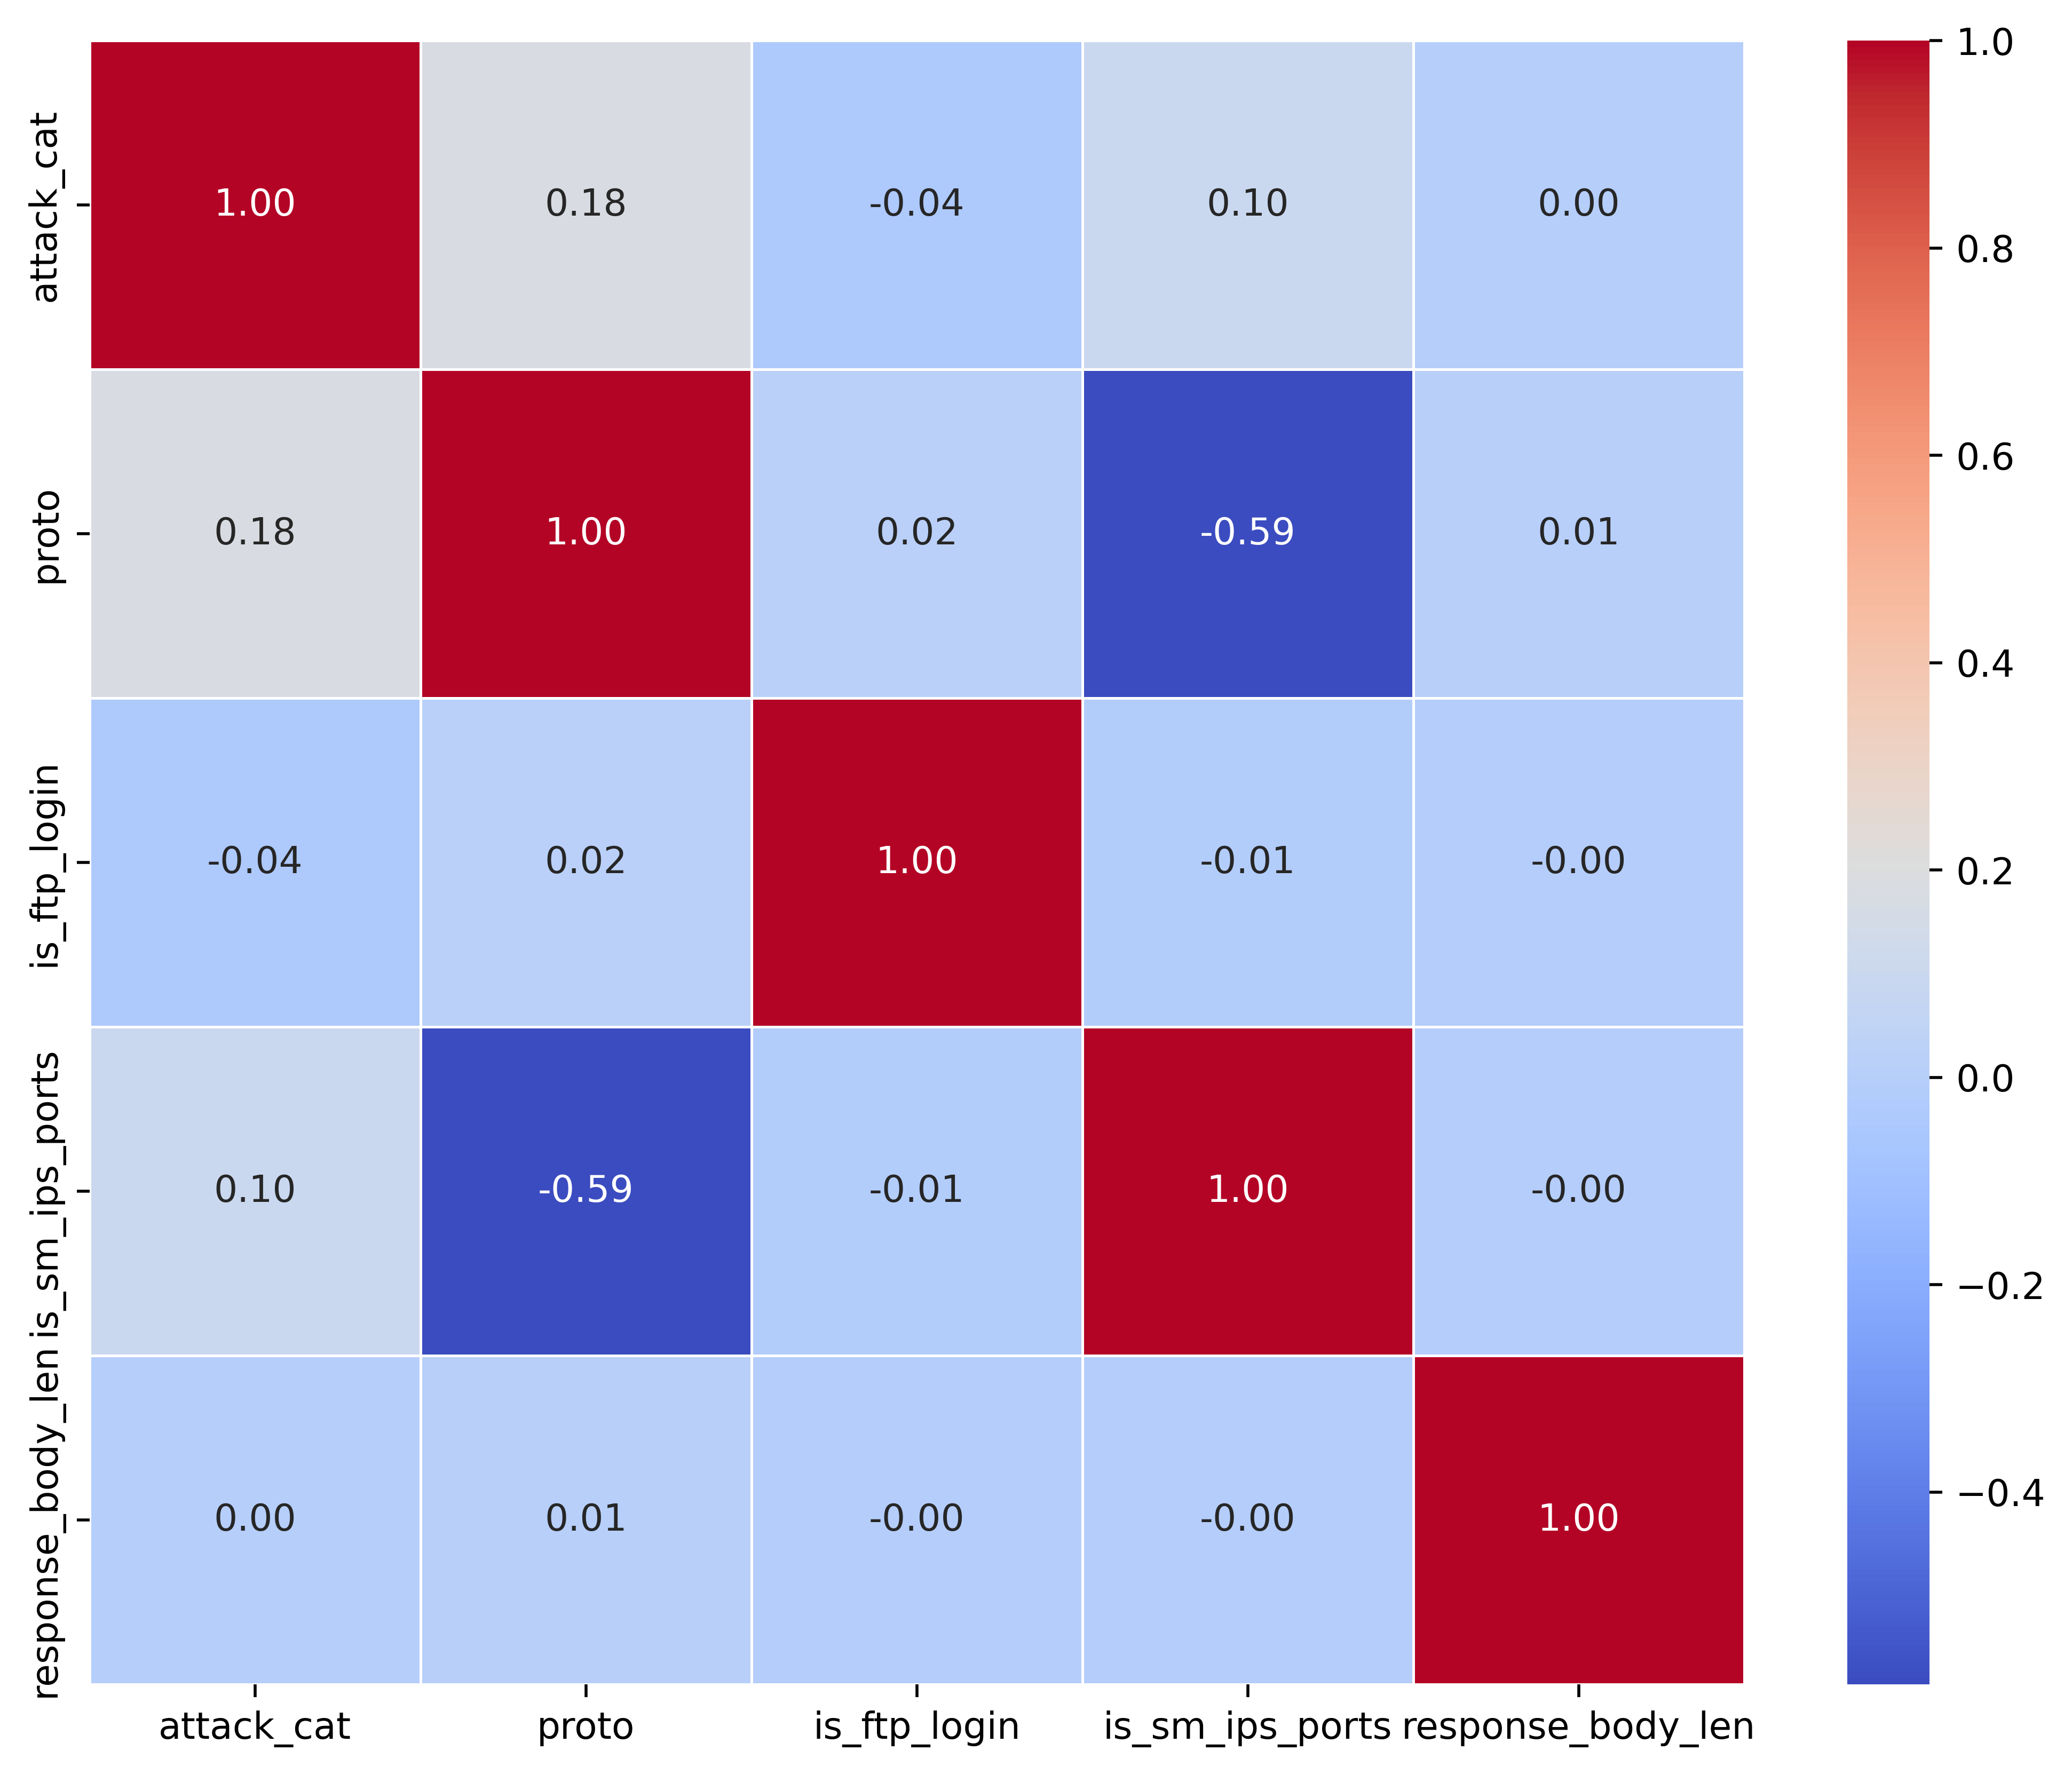

In [56]:
#correlation matrix
df = pd.concat([X_train, X_test], ignore_index=True)
correlation_matrix = df.corr()
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", linewidth=.5, cmap = 'coolwarm')
plt.show()

/Users/evahuang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0     0.9042    1.0000    0.9497     37000
           1     1.0000    0.9136    0.9548     45332

    accuracy                         0.9524     82332
   macro avg     0.9521    0.9568    0.9523     82332
weighted avg     0.9570    0.9524    0.9525     82332



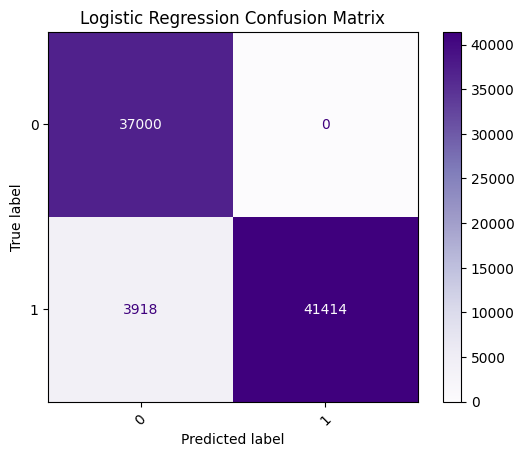

In [57]:
#logistic regression
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

y_pred_lg = logreg.predict(X_test)
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lg, digits=4, zero_division=0))

cm_lg = confusion_matrix(y_test, y_pred_lg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lg)
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

/Users/evahuang/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report for Gaussian Naive Bayes:
               precision    recall  f1-score   support

           0     0.8904    0.9959    0.9402     37000
           1     0.9963    0.8999    0.9457     45332

    accuracy                         0.9430     82332
   macro avg     0.9433    0.9479    0.9429     82332
weighted avg     0.9487    0.9430    0.9432     82332



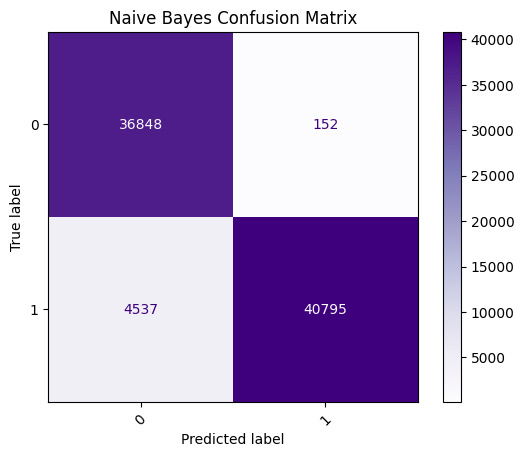

In [58]:
#naive bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb)

print("\nClassification Report for Gaussian Naive Bayes:\n", classification_report(y_test, y_pred_nb, digits=4, zero_division=0))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [ ]:
# mlp
#def mlp_classifier(X_train, X_test, y_train, y_test):
pipeline = Pipeline([('scaler', StandardScaler()),('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300,random_state=42))])

pipeline.fit(X_train, y_train)
y_pred_mlp = pipeline.predict(X_test)  
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("\nClassification Report using MLP: \n", classification_report(y_test, y_pred_mlp, digits=4, zero_division=0))


/Users/evahuang/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report using MLP: 
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     37000
           1     1.0000    1.0000    1.0000     45332

    accuracy                         1.0000     82332
   macro avg     1.0000    1.0000    1.0000     82332
weighted avg     1.0000    1.0000    1.0000     82332



SyntaxError: 'return' outside function (586688085.py, line 10)

/Users/evahuang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Classification Report for Random Forest:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     37000
           1     1.0000    1.0000    1.0000     45332

    accuracy                         1.0000     82332
   macro avg     1.0000    1.0000    1.0000     82332
weighted avg     1.0000    1.0000    1.0000     82332



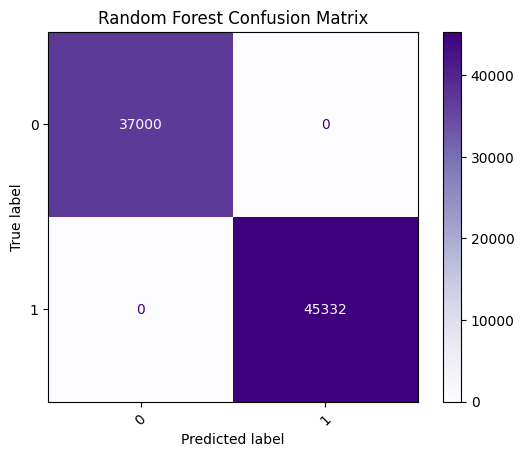

In [ ]:
#random forest
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_f = forest.predict(X_test)
acc = accuracy_score(y_test, y_pred_f)
f1 = f1_score(y_test, y_pred_f, average='weighted')
cm_f = confusion_matrix(y_test, y_pred_f)

#mlp_results = evaluate_model(pipeline, X_test, Y_test)
    
print("\nClassification Report for Random Forest:\n", classification_report(y_test, y_pred_f, digits=4, zero_division=0))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_f)
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title("Random Forest Confusion Matrix")
plt.show()